# Meta-analysis

In [1]:
R.version.string

[1] "R version 4.3.1 (2023-06-16 ucrt)"

In [2]:
#*
system.file(package = 'tidyverse')
system.file(package = 'meta')
system.file(package = 'metafor')
system.file(package = 'IRkernel') #https://www.practicaldatascience.org/html/jupyter_r_notebooks.html
system.file(package = 'dmetar')
system.file(package = 'netmeta')
system.file(package = 'rgl')
# dependencies for bayesian network
system.file(package = 'gemtc')
system.file(package = 'rjags')
#* https://sourceforge.net/projects/mcmc-jags/
#* It is necessary download JAGS and configure the environment variables in windows.
system.file(package = 'igraph') 

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/tidyverse"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/meta"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/metafor"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/IRkernel"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/dmetar"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/netmeta"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/rgl"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/gemtc"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/rjags"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/igraph"

### Only if necessary intall some package

In [3]:
#* If necessary
# install.packages("tidyverse")
# install.packages("gemtc")
install.packages("rjags")

Installing package into 'C:/Users/lucas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'rjags' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rjags'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\lucas\AppData\Local\R\win-library\4.3\00LOCK\rjags\libs\x64\rjags.dll to C:\Users\lucas\AppData\Local\R\win-library\4.3\rjags\libs\x64\rjags.dll: Permission denied"
Warning message:
"restored 'rjags'"



The downloaded binary packages are in
	C:\Users\lucas\AppData\Local\Temp\RtmpiqMMFo\downloaded_packages


## Import Libraries

In [3]:
#* Import packages

#* data package
library(dmetar)

#* library for bayesian network meta-analysis
library(gemtc)
library(igraph)
library(rjags)

Extensive documentation for the dmetar package can be found at: 
 www.bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/

Carregando pacotes exigidos: coda


Attaching package: 'gemtc'


The following object is masked from 'package:dmetar':

    sucra



Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Linked to JAGS 4.3.1

Loaded modules: basemod,bugs



### Dataset

In [4]:
#* Loads specified data sets, or list the available data sets.
data(TherapyFormatsGeMTC)

In [5]:
#* the dataset is composed for two elements, one of which is called 'data'
head(TherapyFormatsGeMTC$data)

,study,diff,std.err,treatment
,<chr>,<dbl>,<dbl>,<chr>
1,"Ausbun, 1997",0.092,0.195,ind
2,"Ausbun, 1997",NA,NA,grp
3,"Crable, 1986",-0.675,0.350,ind
4,"Crable, 1986",NA,NA,grp
5,"Thiede, 2011",-0.107,0.198,ind
6,"Thiede, 2011",NA,NA,grp


In [6]:
TherapyFormatsGeMTC$treat.codes

id,description
<chr>,<chr>
ind,Individual
grp,Group
gsh,Guided Self-Help
tel,Telephone
wlc,Waitlist
cau,Care As Usual
ush,Unguided Self-Help


In [7]:
bayesian_network <- mtc.network(
    data.re = TherapyFormatsGeMTC$data,
    treatments = TherapyFormatsGeMTC$treat.codes
)

In [8]:
summary(bayesian_network)

,t1,t2,nr
,<fct>,<fct>,<int>
1,ind,tel,4
2,ind,wlc,18
3,grp,ind,7
4,grp,gsh,5
5,grp,wlc,18
6,grp,ush,1
7,gsh,ind,4
8,gsh,wlc,36
9,gsh,ush,5


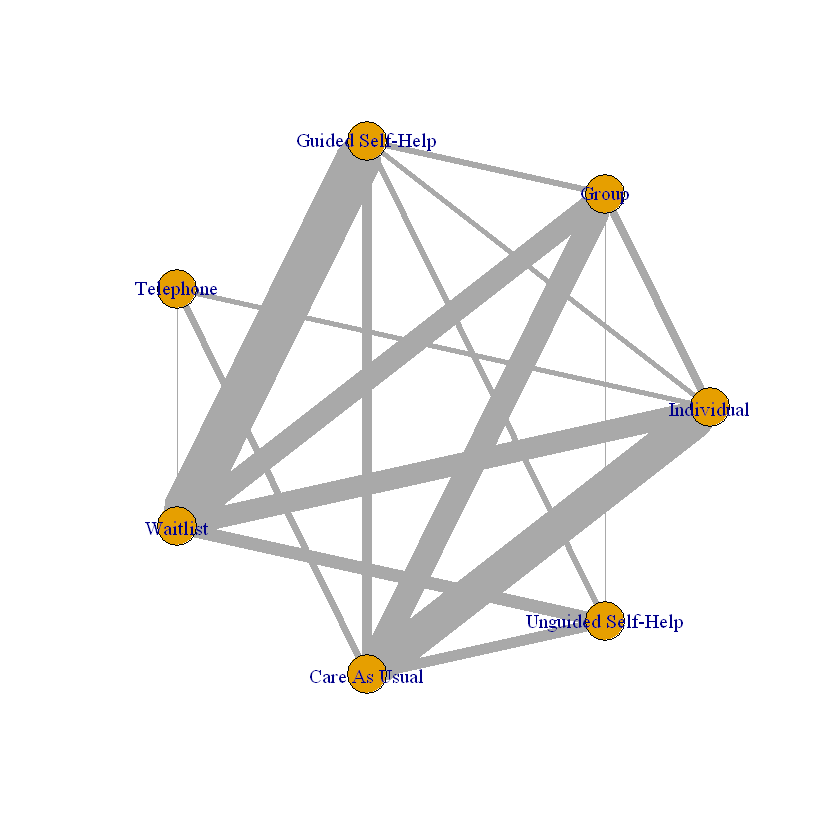

In [9]:
plot(
    bayesian_network,
    use.description = TRUE
) # Usefull treatment names

In [10]:
#* set seed for reproducibility in igraph
set.seed(12345)

Warning message in text.default(x, y, labels = labels, col = label.color, family = label.family, :
"font family not found in Windows font database"


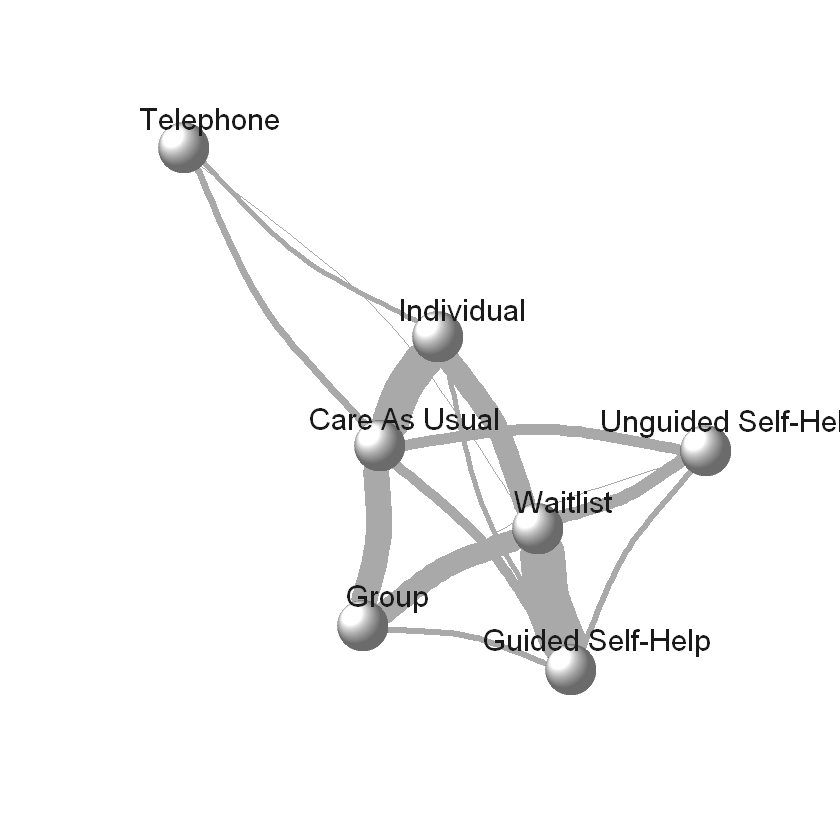

In [11]:
plot(
    bayesian_network,
    use.description = TRUE, # Usefull treatment names
    vertex.color ="white", # node color
    vertex.label.color ="gray10", # treatment label color
    vertex.shape ="sphere", # shape ofthe node
    vertex.label.family ="Helvetica", # label font
    vertex.size = 20, # size of the node
    vertex.label.dist = 2, # distance label-node center
    vertex.label.cex = 1.5, # # node label size
    edge.curved = 0.2, # edge curvature
    layout = layout.fruchterman.reingold
)

In [12]:
# Wegiveourcompiledmodelthename`model`.
compiled_bayesian_model <- mtc.model(
    bayesian_network,
    likelihood = "normal",
    link = "identity",
    linearModel = "random",
    n.chain = 4
)

In [13]:
mcmc1 <- mtc.run(
    compiled_bayesian_model, 
    n.adapt = 50, 
    n.iter = 1000, 
    thin = 10
)
mcmc2 <- mtc.run(
    compiled_bayesian_model, 
    n.adapt = 5000, 
    n.iter = 1e5, 
    thin = 10
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 190
   Total graph size: 2606

Initializing model



Warning message in rjags::jags.model(file.model, data = syntax[["data"]], inits = syntax[["inits"]], :
"Adaptation incomplete"


NOTE: Stopping adaptation


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 190
   Total graph size: 2606

Initializing model



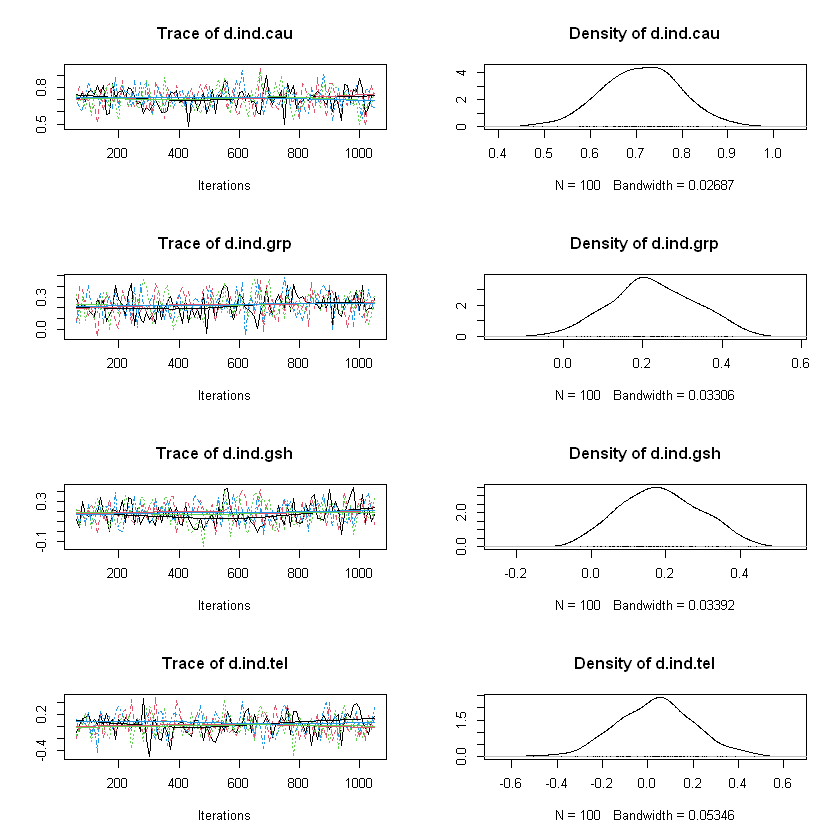

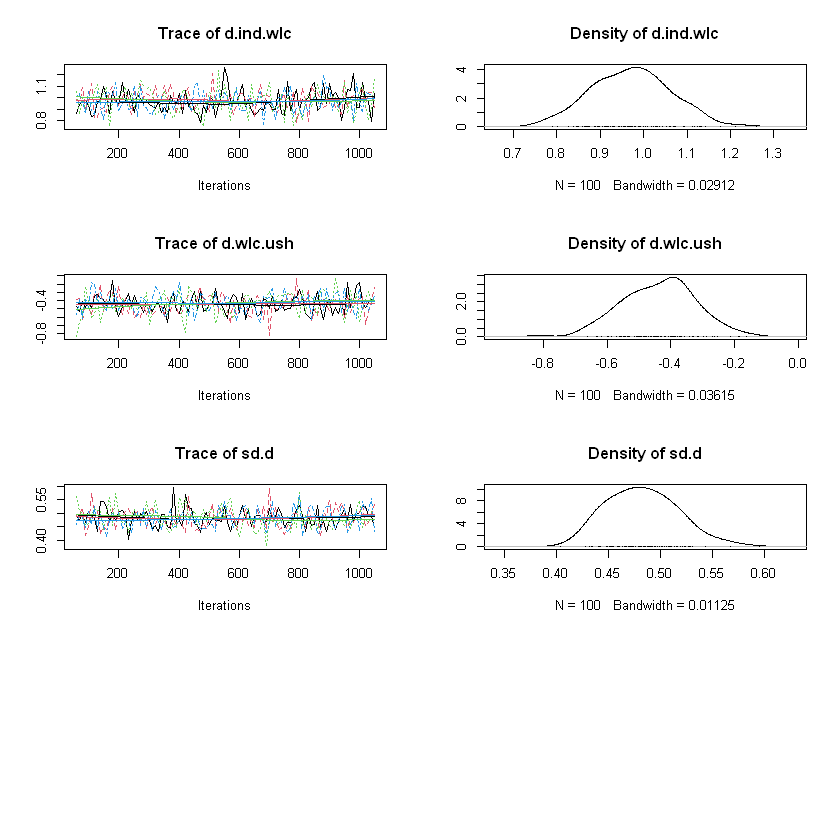

In [14]:
plot(mcmc1)

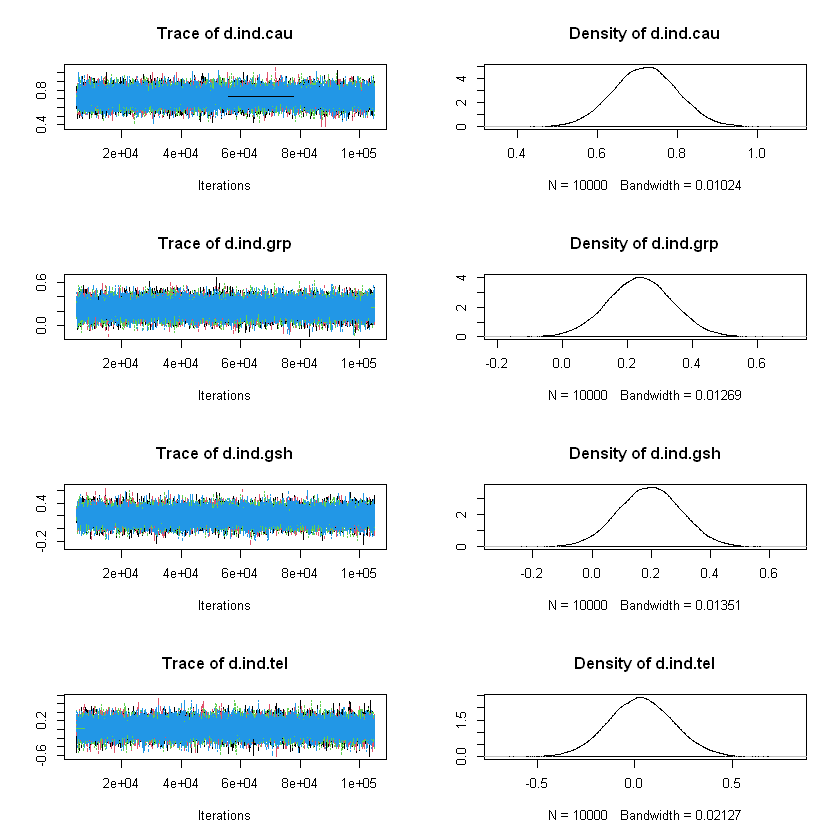

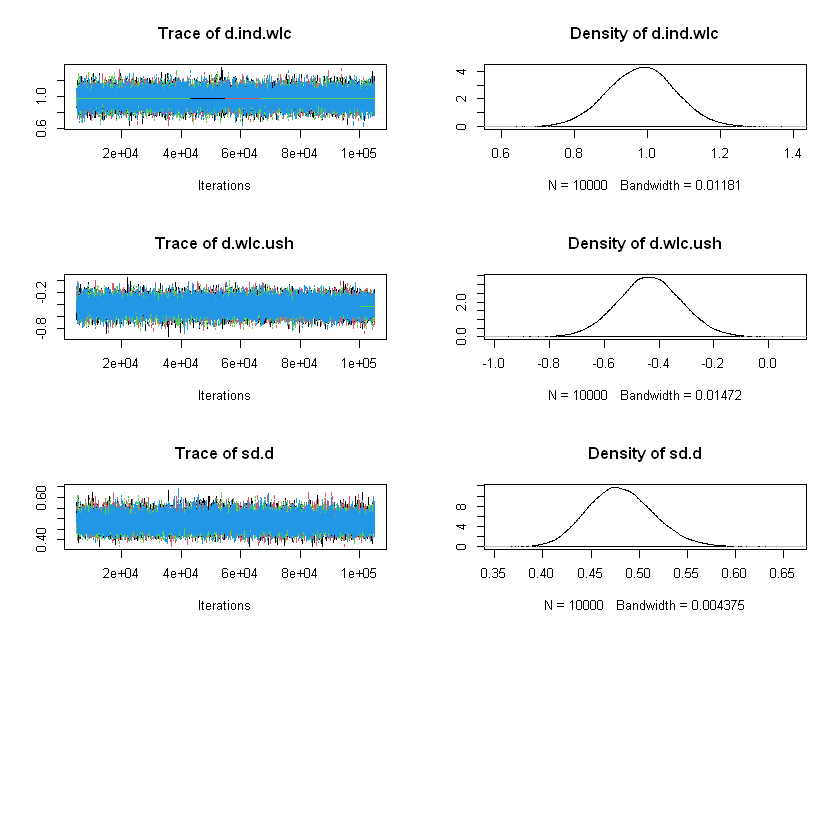

In [15]:
plot(mcmc2)

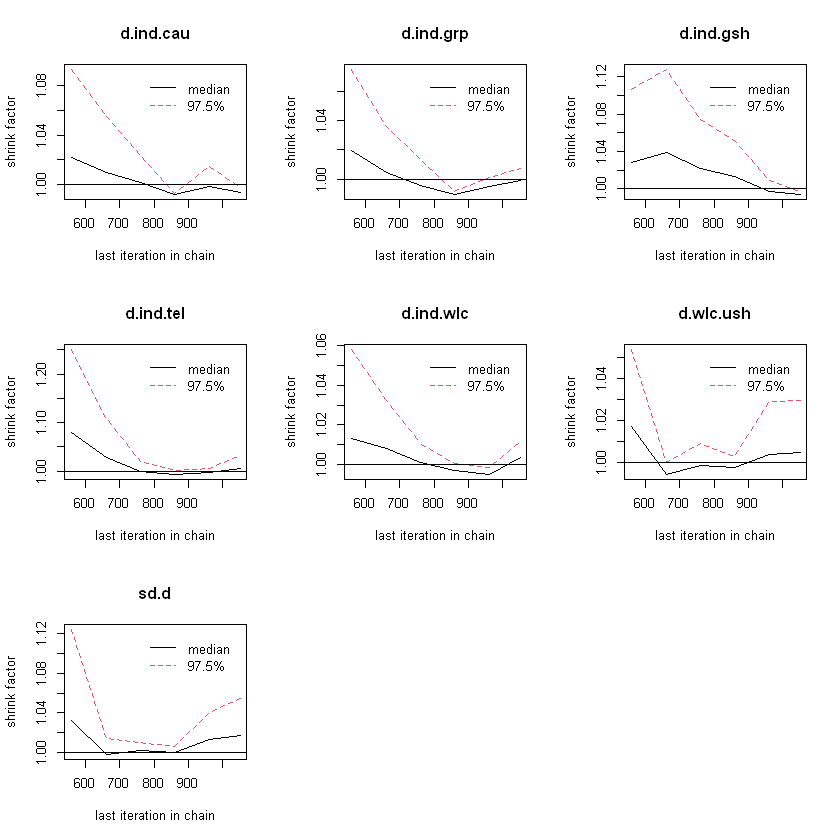

In [16]:
gelman.plot(mcmc1)

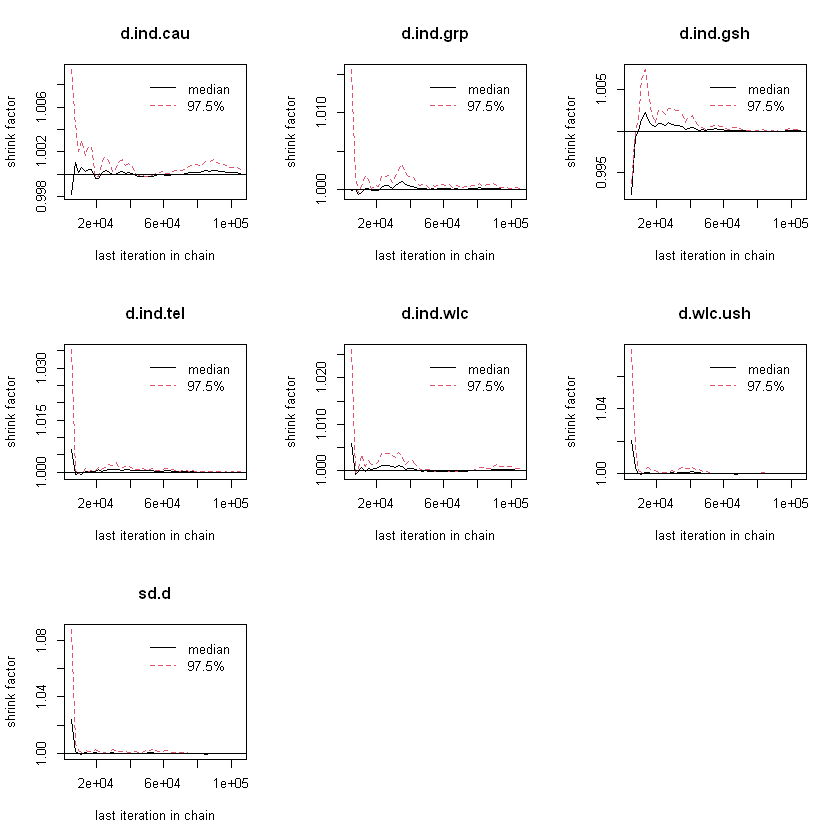

In [17]:
gelman.plot(mcmc2)


In [18]:
gelman.diag(mcmc1)$mpsrf

[1] 1.013722

In [19]:
gelman.diag(mcmc2)$mpsrf

[1] 1.000204

In [38]:
# nodesplit <- mtc.nodesplit(network=bayesian_network,linearModel="random",likelihood="normal",link="identity",n.adapt=5000,n.iter=1e5,thin=10)
nodesplit <- mtc.nodesplit(
    network = bayesian_network,
    # comparisons = mtc.nodesplit.comparisons(bayesian_network),
    # linearModel = "random",
    # likelihood = "normal",
    # link = "identity",
    # n.adapt = 5000,
    # n.iter = 1e5,
    thin = 10
)


Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2746

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 190
   Total graph size: 2725

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2744

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2745

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2745

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2745

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 190
   Total graph size: 2725

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 190
   Total graph size: 2722

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2747

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2747

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2746

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2745

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2747

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2747

Initializing model



Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Likelihood can not be inferred. Defaulting to normal."
Warning message in (function (network, type = "consistency", factor = 2.5, n.chain = 4, :
"Link can not be inferred. Defaulting to identity."


ERROR: Error in (function (yi, vi, sei, weights, ai, bi, ci, di, n1i, n2i, x1i, : Fisher scoring algorithm did not converge. See 'help(rma)' for possible remedies.


In [ ]:
summary(nodesplit)

In [ ]:
plot(summary(nodesplit))

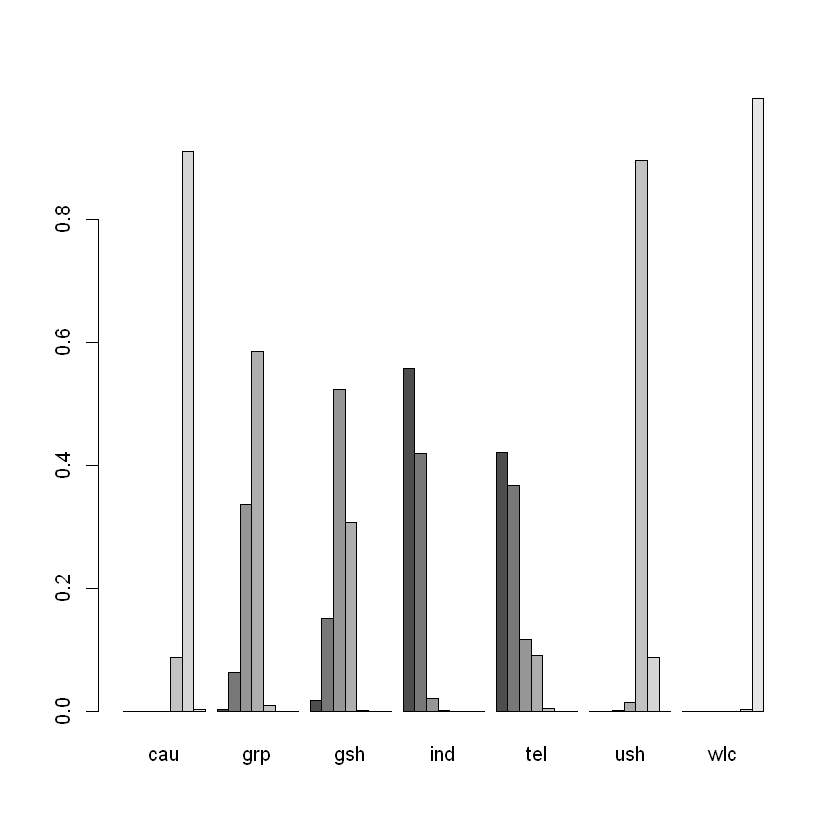

In [21]:
rank <- rank.probability(mcmc2, preferredDirection = -1)
plot(rank, beside=TRUE)

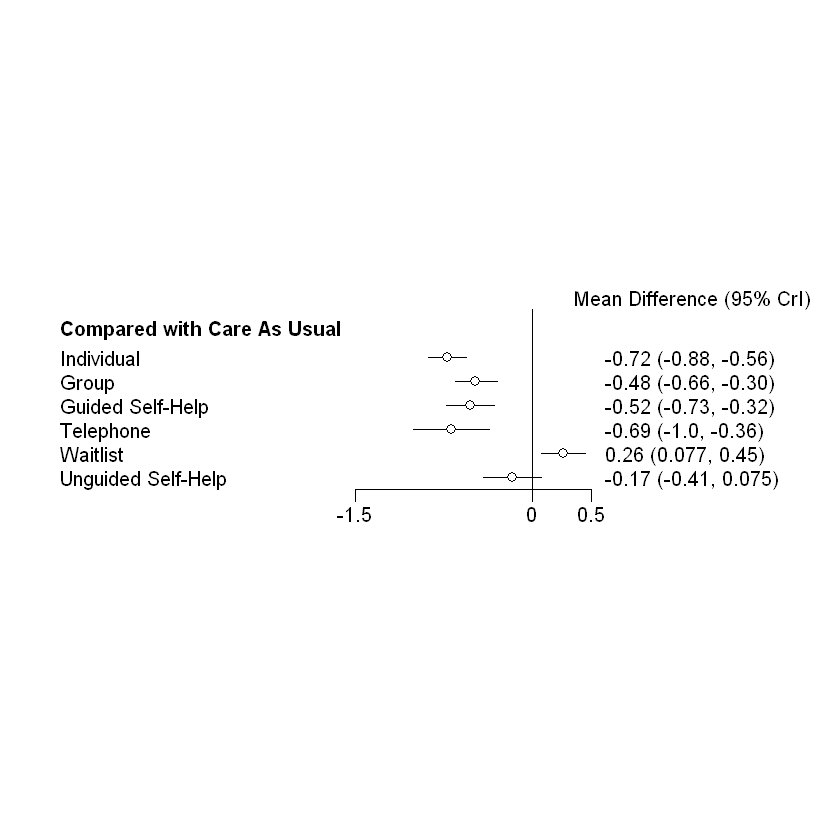

In [22]:
forest(
    relative.effect(mcmc2, t1 = "cau"),
    use.description = TRUE, # Use long treatment names
    xlim = c(-1.5, 0.5)
)

In [23]:
rank.probability <- rank.probability(mcmc2)
sucra <- dmetar::sucra(
    rank.probability, 
    lower.is.better = TRUE
)
sucra

           SUCRA
ind 0.9223666667
tel 0.8513458333
gsh 0.6458208333
grp 0.5774250000
ush 0.3218416667
cau 0.1806791667
wlc 0.0005208333

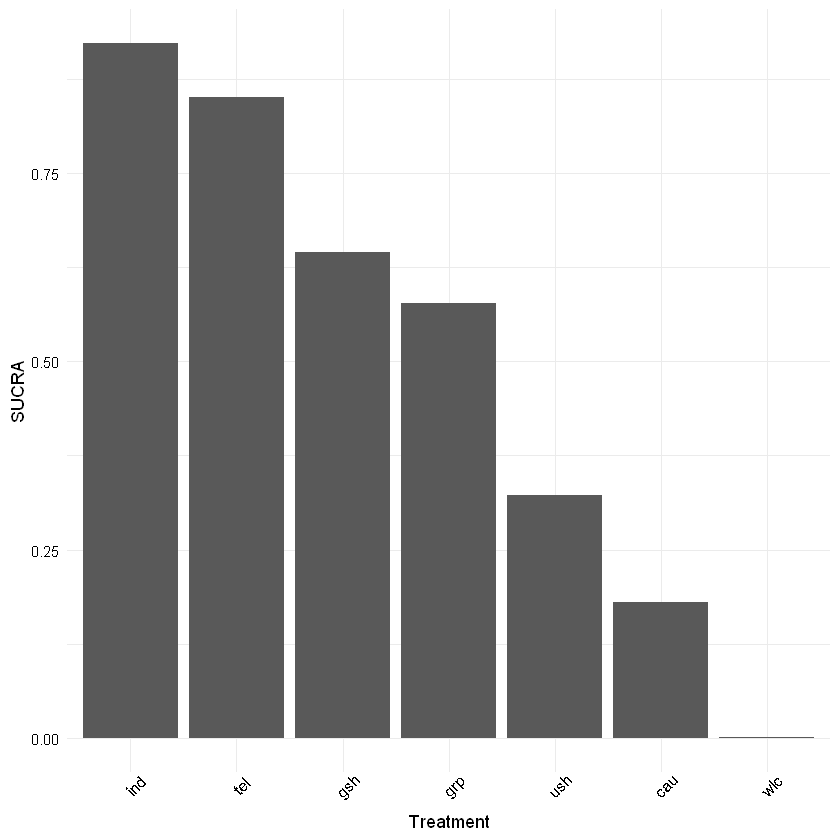

In [24]:
plot(sucra)

In [25]:
results <- relative.effect.table(mcmc2)
save(results, file ="results_mcmc2.csv")

## Meta-regression

In [26]:
TherapyFormatsGeMTC$study.info

study,rob
<chr>,<int>
"Campbell, 2000",1
"Reynolds, 1989",1
"Carpenter, 1994",0
"Shrednik, 2000",1
"Lesley, 1999",1
"Wyatt, 2003",0
"Lemon, 2005",1
"James, 2012",0
"Graesch, 2000",0


In [27]:
network.mr <- mtc.network(
    data.re = TherapyFormatsGeMTC$data,
    studies = TherapyFormatsGeMTC$study.info,
    treatments = TherapyFormatsGeMTC$treat.codes
)

In [28]:
regressor <- list(
    coefficient = "shared",
    variable = "rob",
    control = "cau"
)

In [29]:
model.mr <- mtc.model(
    network.mr,
    likelihood = "normal",
    link = "identity",
    type = "regression",
    regressor = regressor
)

In [30]:
mcmc3 <- mtc.run(
    model.mr,
    n.adapt = 5000,
    n.iter = 1e5,
    thin = 10
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 182
   Unobserved stochastic nodes: 191
   Total graph size: 2980

Initializing model



In [31]:
summary(mcmc3)


Results on the Mean Difference scale

Iterations = 5010:105000
Thinning interval = 10 
Number of chains = 4 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean      SD  Naive SE Time-series SE
d.ind.cau  0.69962 0.07956 0.0003978      0.0004152
d.ind.grp  0.19304 0.09985 0.0004992      0.0005261
d.ind.gsh  0.16080 0.10511 0.0005255      0.0005615
d.ind.tel  0.02498 0.16306 0.0008153      0.0008108
d.ind.wlc  0.95026 0.09206 0.0004603      0.0004967
d.wlc.ush -0.45467 0.11537 0.0005769      0.0005761
sd.d       0.47005 0.03418 0.0001709      0.0001738
B         -0.33262 0.13065 0.0006533      0.0010355

2. Quantiles for each variable:

               2.5%      25%      50%     75%    97.5%
d.ind.cau  0.541977  0.64622  0.69986  0.7531  0.85571
d.ind.grp -0.001348  0.12537  0.19291  0.2598  0.39036
d.ind.gsh -0.044572  0.09030  0.16097  0.2314  0.36593
d.ind.tel -0.294726 -0.08482  0.02487  

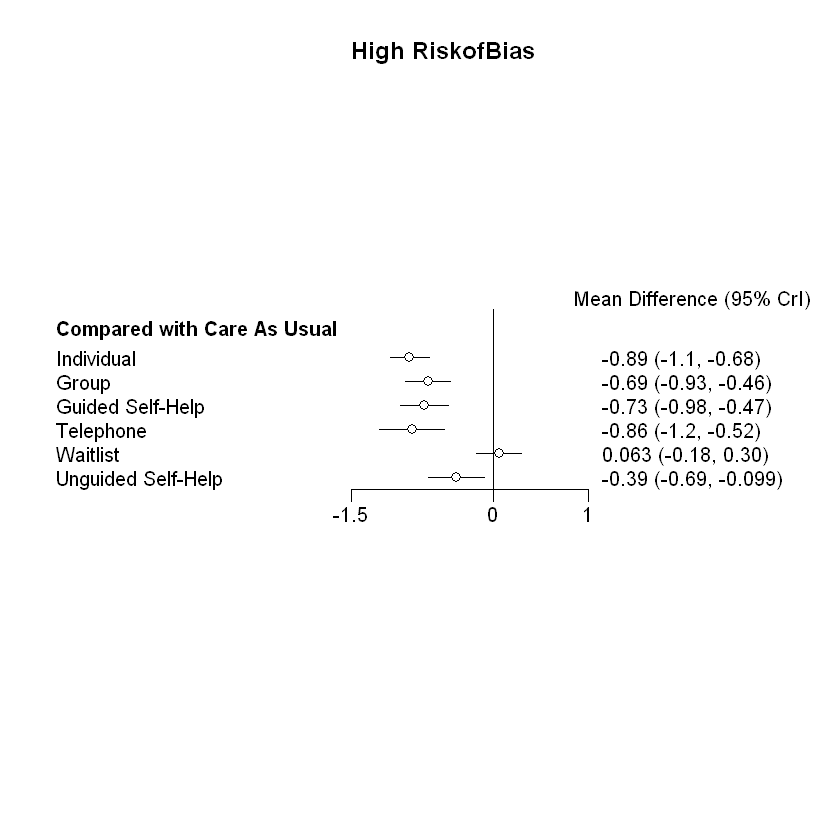

In [32]:
forest(
    relative.effect(mcmc3, t1 = "cau", covariate = 1),
    use.description = TRUE, 
    xlim = c(-1.5, 1)
)
title("High RiskofBias")

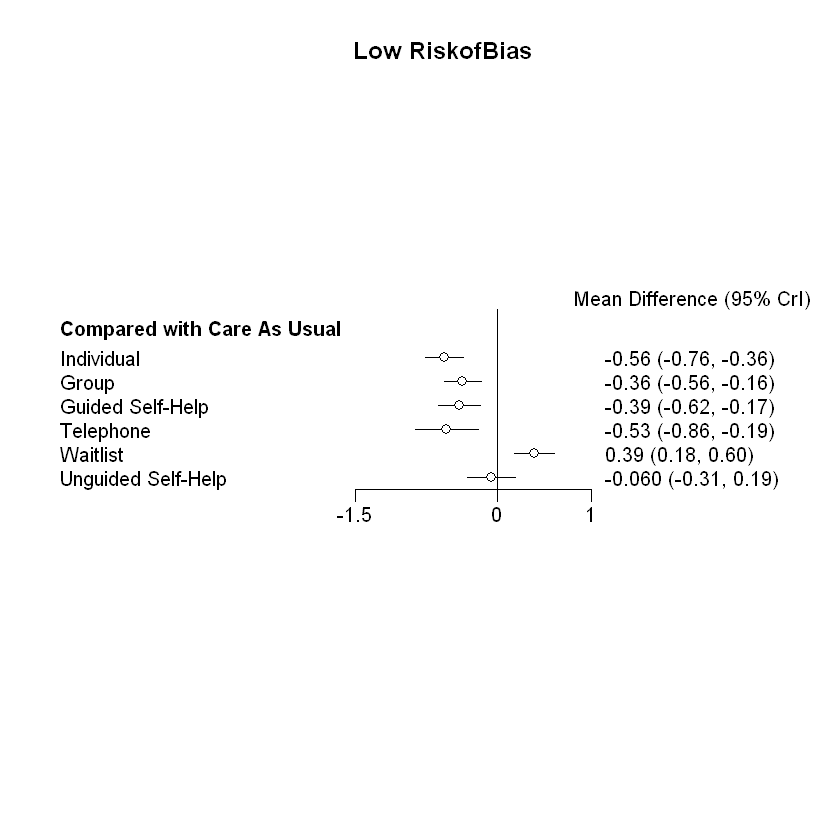

In [33]:
forest(
    relative.effect(mcmc3, t1 = "cau", covariate = 0),
    use.description = TRUE, 
    xlim = c(-1.5, 1)
)
title("Low RiskofBias")

In [34]:
summary(mcmc3)$DIC

Dbar          pD         DIC data points 
  185.76512    74.38087   260.14599   183.00000

In [35]:
summary(mcmc2)$DIC

Dbar          pD         DIC data points 
   185.3367    137.9063    323.2430    183.0000